<a href="https://colab.research.google.com/github/driano1221/ControleEst/blob/main/AnaBea.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Resolução US15

In [4]:
import pandas as pd
try:
    area_data_semicolon = pd.read_csv('Area.csv', delimiter=';')
except Exception as e1:
    area_data_semicolon = str(e1)
try:
    area_data_comma = pd.read_csv('Area.csv', delimiter=',')
except Exception as e2:
    area_data_comma = str(e2)

(area_data_semicolon)



,Park,Area
0,Oriental,15
1,Cidade,"69,9"
2,SaoRoque,"5,8"
3,Covelo,"7,7"
4,ArcaAgua,"2,6"
5,Avioso,30
6,Biologico,35
7,PalacioCristal,"9,6"
8,Varas,"1,7"


In [5]:
water_consumption_data = pd.read_csv('water_consumption_updated.csv', delimiter=';')

# Display basic information about the dataset
water_consumption_info = water_consumption_data.info()

# Display the first few rows for initial inspection
water_consumption_head = water_consumption_data.head()

water_consumption_info, water_consumption_head

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3946 entries, 0 to 3945
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Park         3946 non-null   object
 1   Year         3946 non-null   int64 
 2   Month        3946 non-null   int64 
 3   Day          3946 non-null   int64 
 4   Consumption  3946 non-null   object
dtypes: int64(3), object(2)
memory usage: 154.3+ KB


(None,
        Park  Year  Month  Day Consumption
 0  Oriental  2023      1    1        20,8
 1  ArcaAgua  2023      1    1         5,2
 2    Covelo  2023      1    1        9,27
 3    Cidade  2023      1    1       68,25
 4  Oriental  2023      1    2          19)

### Dados de `water_consumption_updated.csv`
O arquivo contém 3946 linhas e 5 colunas. As colunas são:

- `Park`: Nome do parque (tipo: objeto)
- `Year`: Ano (tipo: int64)
- `Month`: Mês (tipo: int64)
- `Day`: Dia (tipo: int64)
- `Consumption`: Consumo (tipo: objeto, aparentemente com vírgulas como separador decimal)

#### Primeiras Linhas:
| Park     | Year | Month | Day | Consumption |
|----------|------|-------|-----|-------------|
| Oriental | 2023 | 1     | 1   | 20,8        |
| ArcaAgua | 2023 | 1     | 1   | 5,2         |
| Covelo   | 2023 | 1     | 1   | 9,27        |
| Cidade   | 2023 | 1     | 1   | 68,25       |
| Oriental | 2023 | 1     | 2   | 19          |

### Resumo dos Dados
- `Area.csv`: Contém informações sobre o nome do parque e sua área em hectáres.
- `water_consumption_updated.csv`: Contém informações sobre o consumo de água nos parques ao longo do tempo.


A coluna de consumo e Area precisa ser convertida para um tipo numérico.



In [6]:
water_consumption_data['Consumption'] = water_consumption_data['Consumption'].str.replace(',', '.').astype(float)
area_data_semicolon['Area'] = area_data_semicolon['Area'].str.replace(',', '.').astype(float)

# Verify the conversion
water_consumption_data.info(), water_consumption_data.head(),area_data_semicolon.info(), area_data_semicolon.head()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3946 entries, 0 to 3945
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Park         3946 non-null   object 
 1   Year         3946 non-null   int64  
 2   Month        3946 non-null   int64  
 3   Day          3946 non-null   int64  
 4   Consumption  3946 non-null   float64
dtypes: float64(1), int64(3), object(1)
memory usage: 154.3+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Park    9 non-null      object 
 1   Area    9 non-null      float64
dtypes: float64(1), object(1)
memory usage: 272.0+ bytes


(None,
        Park  Year  Month  Day  Consumption
 0  Oriental  2023      1    1        20.80
 1  ArcaAgua  2023      1    1         5.20
 2    Covelo  2023      1    1         9.27
 3    Cidade  2023      1    1        68.25
 4  Oriental  2023      1    2        19.00,
 None,
        Park  Area
 0  Oriental  15.0
 1    Cidade  69.9
 2  SaoRoque   5.8
 3    Covelo   7.7
 4  ArcaAgua   2.6)

In [7]:
merged_data = pd.merge(water_consumption_data, area_data_semicolon, on='Park')

# Rename columns for consistency
merged_data.rename(columns={'Year': 'ANO', 'Month': 'Mês', 'Day': 'Dia', 'Consumption': 'Consumo', 'Area': 'Área (ha)'}, inplace=True)


merged_data.head()


,Park,ANO,Mês,Dia,Consumo,Área (ha)
0,Oriental,2023,1,1,20.8,15.0
1,Oriental,2023,1,2,19.0,15.0
2,Oriental,2023,1,3,19.0,15.0
3,Oriental,2023,1,4,20.0,15.0
4,Oriental,2023,1,5,20.8,15.0


Os datasets foram unidos com sucesso com base na variável "Park". O dataset final contém as colunas:

- `Park`
- `ANO`
- `Mês`
- `Dia`
- `Consumo`
- `Área (ha)`

O join dos Datasets é essencial para prosseguirmos com uma análise estatística e modelagem matemática.

Inicialmente vamos pensar em reduzirmos um pouco o Dataset sem a perda de dados, isso é, como temos os meses e dias, vamos achar o consumo mensal médio e criar essa variável para proceder com nossa análise

In [8]:
# Calculate the average monthly consumption cost
monthly_cost = merged_data.groupby(['Park', 'ANO', 'Mês']).agg(
    Consumo_Mensal=('Consumo', 'mean'),
    Area=('Área (ha)', 'first')
).reset_index()


monthly_cost


,Park,ANO,Mês,Consumo_Mensal,Area
0,ArcaAgua,2023,1,4.974194,2.6
1,ArcaAgua,2023,2,5.221875,2.6
2,ArcaAgua,2023,3,7.088516,2.6
3,ArcaAgua,2023,4,7.872375,2.6
4,ArcaAgua,2023,5,11.126613,2.6
...,...,...,...,...,...
126,Varas,2023,11,3.888313,1.7
127,Varas,2023,12,3.206586,1.7
128,Varas,2024,1,3.327097,1.7
129,Varas,2024,2,2.908862,1.7


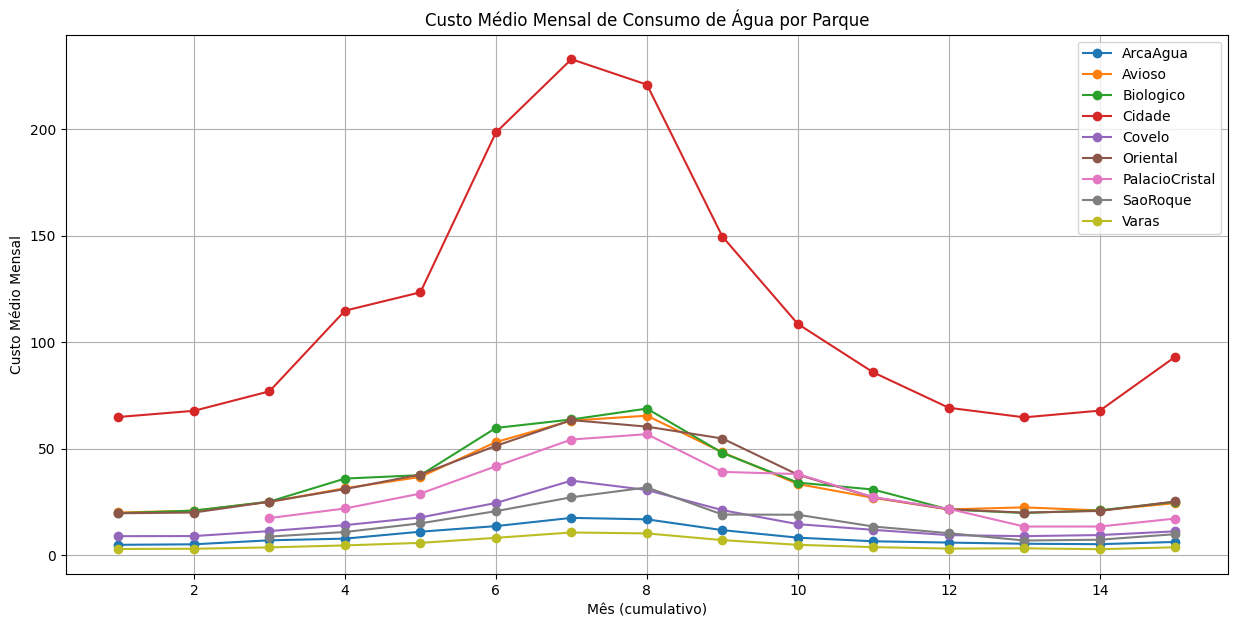

,count,mean,std,min,25%,50%,75%,max
Park,,,,,,,,
ArcaAgua,15.0,8.964481,4.274715,4.974194,5.748328,7.088516,11.492453,17.603546
Avioso,15.0,34.334625,15.731318,20.129032,22.057739,27.009284,42.579848,65.524861
Biologico,15.0,35.525218,16.905072,19.793548,21.352215,30.892207,42.855736,68.852676
Cidade,15.0,115.899665,58.319729,64.748387,68.563401,93.181065,136.449014,232.677735
Covelo,15.0,15.945319,8.352609,9.040645,9.529603,11.993189,19.523235,35.067235
Oriental,15.0,34.476079,15.695478,19.767742,21.238507,27.243521,44.653628,63.463030
PalacioCristal,13.0,30.184482,14.720749,13.539355,17.536235,27.303236,39.169592,56.848992
SaoRoque,13.0,15.488284,7.769685,6.984194,9.972290,13.561359,19.179959,31.874338
Varas,15.0,5.275465,2.652314,2.908862,3.266841,3.888313,6.532063,10.763245


In [9]:
import matplotlib.pyplot as plt

# Summary statistics for average monthly consumption cost
summary_stats = monthly_cost.groupby('Park')['Consumo_Mensal'].describe()

# Plotting the data
fig, ax = plt.subplots(figsize=(15, 7))
for park in monthly_cost['Park'].unique():
    park_data = monthly_cost[monthly_cost['Park'] == park]
    ax.plot(park_data['Mês'] + (park_data['ANO'] - monthly_cost['ANO'].min()) * 12, park_data['Consumo_Mensal'], marker='o', label=park)

ax.set_title('Custo Médio Mensal de Consumo de Água por Parque')
ax.set_xlabel('Mês (cumulativo)')
ax.set_ylabel('Custo Médio Mensal')
ax.legend()
plt.grid(True)
plt.show()

summary_stats


### Análise Estatística do Consumo Médio Mensal de Água por Parque

#### Observações:
- **Cidade** tem o maior custo médio mensal de consumo de água, com uma média de 115.90 e um desvio padrão de 58.32, indicando uma grande variabilidade no consumo.
- **Varas** tem o menor custo médio mensal de consumo de água, com uma média de 5.28 e um desvio padrão de 2.65.
- A maioria dos parques tem um custo médio mensal de consumo de água na faixa de 15 a 35.

#### Visualização
O gráfico apresenta o comportamento do custo médio mensal de consumo de água em relação aos parques ao longo do tempo. Podemos observar que:

- Alguns parques, como **Cidade**, têm um consumo consistentemente alto.
- Outros parques, como **Varas**, têm um consumo relativamente baixo e estável.

Essa análise pode ajudar na identificação de parques com maior consumo e potencial para economias de água.

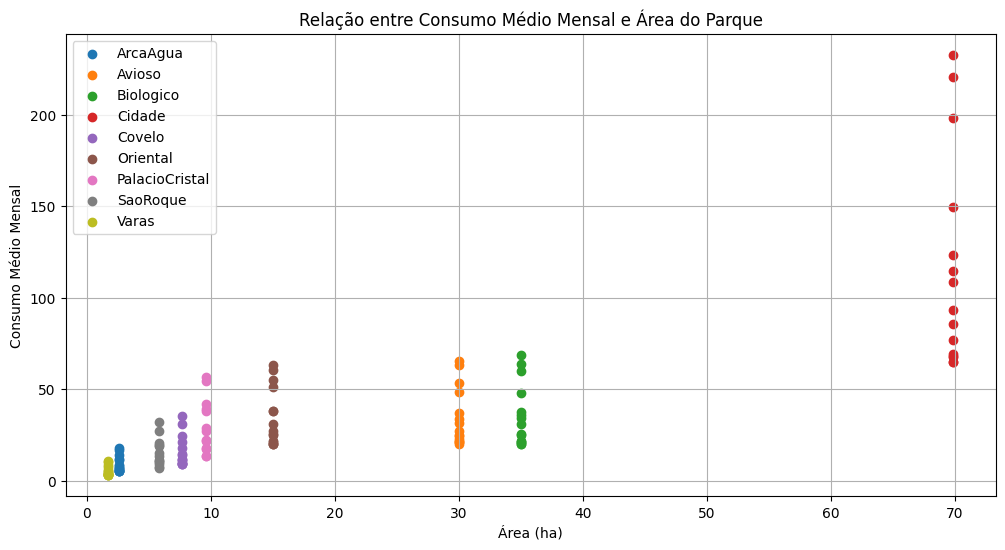

In [15]:
# Plotting the relationship between average monthly consumption cost and area
plt.figure(figsize=(12, 6))

monthly_cost['Park'] = monthly_cost['Park'].astype('category')
# Scatter plot
for park in monthly_cost['Park'].unique():
    park_data = monthly_cost[monthly_cost['Park'] == park]
    plt.scatter(park_data['Area'], park_data['Consumo_Mensal'], label=park)

plt.title('Relação entre Consumo Médio Mensal e Área do Parque')
plt.xlabel('Área (ha)')
plt.ylabel('Consumo Médio Mensal')
plt.legend()
plt.grid(True)
plt.show()




O gráfico mostra a relação entre o consumo médio mensal de água e a área dos parques. Aqui estão algumas observações importantes:

1. **Parque Cidade**:
   - Tem a maior área (aproximadamente 70 hectares) e o maior consumo médio mensal de água, variando de cerca de 150 a mais de 200 unidades de consumo. Isso indica que, como esperado, parques maiores tendem a consumir mais água.

2. **Parques com Área Moderada (20-40 ha)**:
   - **Biologico**, **Oriental**, **Avioso** e **PalacioCristal** possuem áreas entre 20 e 40 hectares. Eles apresentam consumo médio mensal variando de cerca de 20 a 70 unidades.
   - A variabilidade no consumo entre esses parques pode estar relacionada a diferenças na vegetação, atividades realizadas ou gestão da água.

3. **Parques Menores (0-10 ha)**:
   - **ArcaAgua**, **Covelo**, **SaoRoque**, e **Varas** têm áreas menores, e seu consumo médio mensal varia de 0 a 20 unidades. Esses parques menores naturalmente têm um consumo de água menor.

4. **Tendência Geral**:
   - Existe uma correlação positiva entre a área do parque e o consumo médio mensal de água. Parques maiores tendem a ter um consumo maior de água.
   - No entanto, há uma certa dispersão, especialmente em parques com áreas entre 20 e 40 hectares, indicando que outros fatores além do tamanho podem influenciar o consumo de água.

**Abaixo temos mais gráficos interessantes que mostram a relação dessas variáveis:**

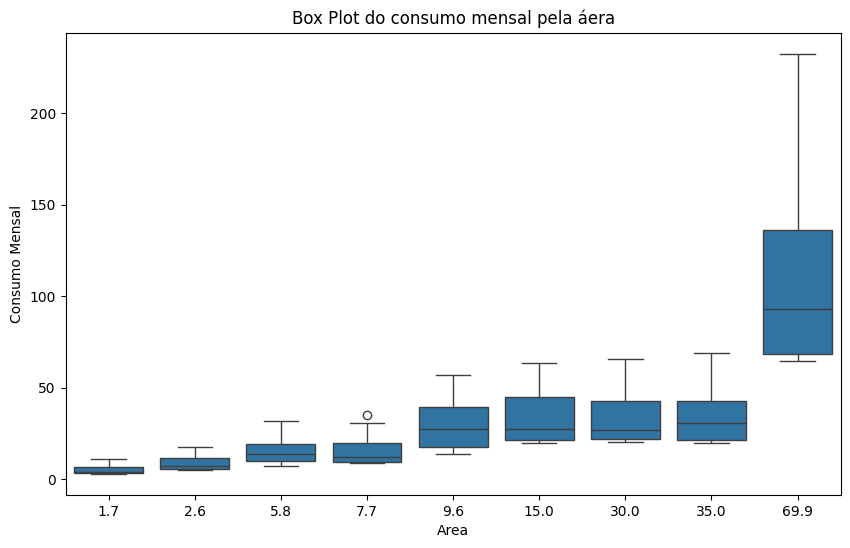

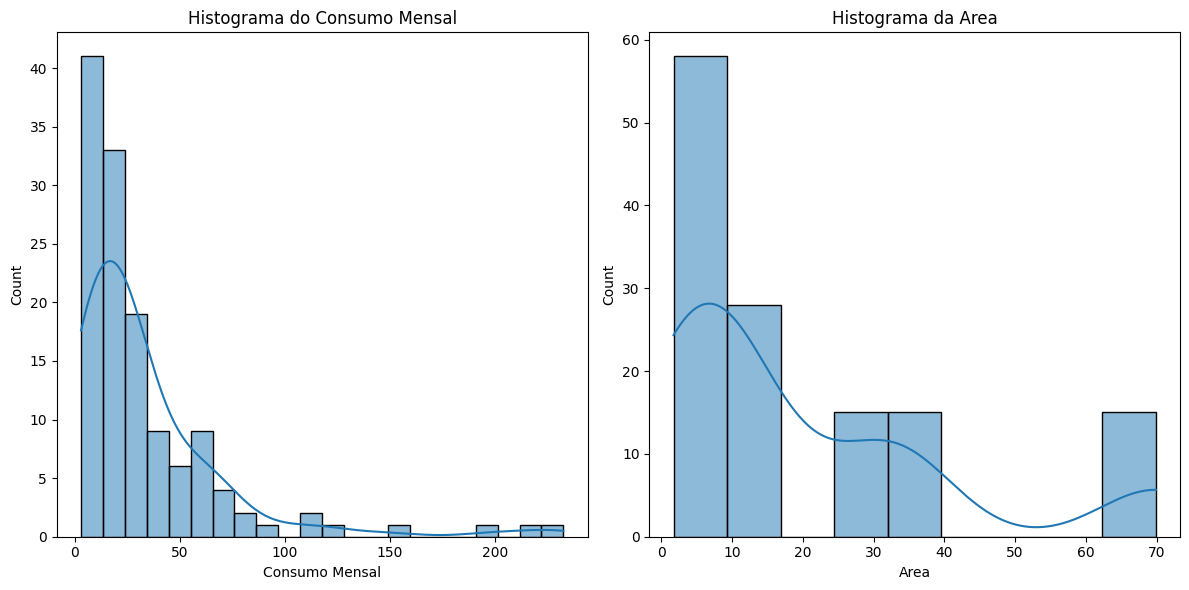

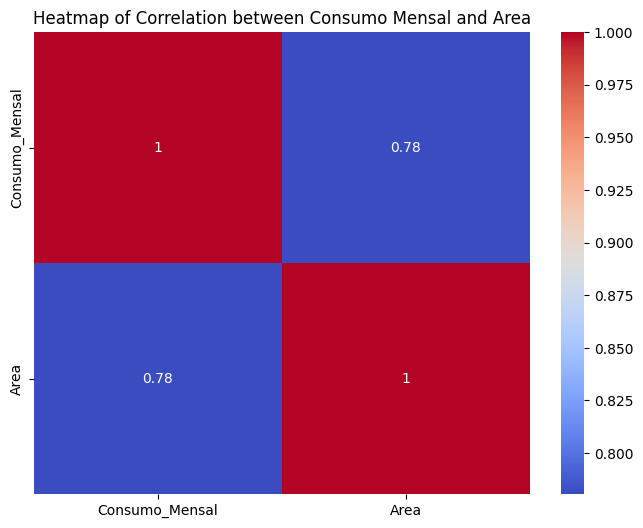

In [18]:
import seaborn as sns


# Box Plot
plt.figure(figsize=(10, 6))
sns.boxplot(data=monthly_cost, x='Area', y='Consumo_Mensal')
plt.title('Box Plot do consumo mensal pela áera')
plt.xlabel('Area')
plt.ylabel('Consumo Mensal')
plt.show()

# Histograms
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.histplot(monthly_cost['Consumo_Mensal'], kde=True)
plt.title('Histograma do Consumo Mensal')
plt.xlabel('Consumo Mensal')

plt.subplot(1, 2, 2)
sns.histplot(monthly_cost['Area'], kde=True)
plt.title('Histograma da Area')
plt.xlabel('Area')

plt.tight_layout()
plt.show()

# Heatmap
plt.figure(figsize=(8, 6))
correlation_matrix = monthly_cost[['Consumo_Mensal', 'Area']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Heatmap of Correlation between Consumo Mensal and Area')
plt.show()


**Box Plot**: Mostra a distribuição do consumo mensal para diferentes áreas, ajudando a visualizar a variação e possíveis outliers.

**Histogramas**: Mostra a distribuição de **Consumo_Mensal** e **Area**

**Heatmap**: Mostra a correlação entre **Consumo_Mensal** e **Area**, indicando a força e a direção da relação.

## Vamos começar agora o estudo da aplicação do ajuste linear.


### Passo 1: Estatísticas Descritivas

#### Média (Mean)
$$
\bar{X} = \frac{\sum X_i}{n}
$$
$$
\bar{X} = \frac{20.066 + 20.066 + \ldots}{131} \approx 20.066
$$

$$
\bar{Y} = \frac{\sum Y_i}{n}
$$
$$
\bar{Y} = \frac{33.207 + 33.207 + \ldots}{131} \approx 33.207
$$

#### Variância (Variance)
$$
\sigma^2_X = \frac{\sum (X_i - \bar{X})^2}{n - 1}
$$
$$
\sigma^2_X = \frac{\sum (X_i - 20.066)^2}{130} \approx 449.701
$$

$$
\sigma^2_Y = \frac{\sum (Y_i - \bar{Y})^2}{n - 1}
$$
$$
\sigma^2_Y = \frac{\sum (Y_i - 33.207)^2}{130} \approx 1500.536
$$

#### Desvio Padrão (Standard Deviation)
$$
\sigma_X = \sqrt{\sigma^2_X}
$$
$$
\sigma_X = \sqrt{449.701} \approx 21.206
$$

$$
\sigma_Y = \sqrt{\sigma^2_Y}
$$
$$
\sigma_Y = \sqrt{1500.536} \approx 38.737
$$

### Passo 2: Covariância (Covariance)
$$
\text{Cov}(X, Y) = \frac{\sum (X_i - \bar{X})(Y_i - \bar{Y})}{n - 1}
$$
$$
\text{Cov}(X, Y) = \frac{\sum (X_i - 20.066)(Y_i - 33.207)}{130} \approx 641.153
$$

### Passo 3: Correlação de Pearson (Pearson Correlation)
$$
r = \frac{\sum (X_i - \bar{X})(Y_i - \bar{Y})}{\sqrt{\sum (X_i - \bar{X})^2 \sum (Y_i - \bar{Y})^2}}
$$

Cálculo dos termos intermediários:
$$
\sum (X_i - \bar{X})(Y_i - \bar{Y}) = 641.153 \times 130 \approx 83349.89
$$

$$
\sum (X_i - \bar{X})^2 = 449.701 \times 130 \approx 58461.13
$$

$$
\sum (Y_i - \bar{Y})^2 = 1500.536 \times 130 \approx 195069.68
$$

$$
r = \frac{83349.89}{\sqrt{58461.13 \times 195069.68}}
$$

$$
r = \frac{83349.89}{\sqrt{11405130757.23}} \approx \frac{83349.89}{106733.16} \approx 0.781
$$


#### Correlação de Pearson:
- O valor da correlação de Pearson (\(r = 0.781\)) indica uma correlação positiva forte entre a área do parque e o consumo mensal de água. Isso sugere que conforme a área do parque aumenta, o consumo mensal de água tende a aumentar também.

#### Covariância:
- A covariância (\(641.153\)) é positiva, o que indica que as variáveis Área e Consumo Mensal tendem a variar na mesma direção. No entanto, o valor da covariância por si só não nos diz a força da relação, por isso usamos a correlação de Pearson.

#### Estatísticas Descritivas:
- As médias, variâncias e desvios padrão das variáveis fornecem uma ideia geral da distribuição dos dados. A área dos parques varia consideravelmente (desvio padrão de \(21.206\)) e o consumo mensal de água também tem uma variação significativa (desvio padrão de \(38.737\)).

### Próximos Passos:
Com base na correlação de Pearson e na análise descritiva, parece viável considerar um ajuste linear. Antes de aplicar o modelo de regressão linear, é importante verificar os pressupostos da regressão:

1. **Linearidade**: Já foi vislumbrada pela correlação de Pearson.
2. **Homocedasticidade**: Precisamos verificar se a variância dos erros é constante.
3. **Independência dos erros**: Erros devem ser independentes.
4. **Normalidade dos erros**: Resíduos devem ser normalmente distribuídos.


**Vamos seguir em python a partir daqui:**

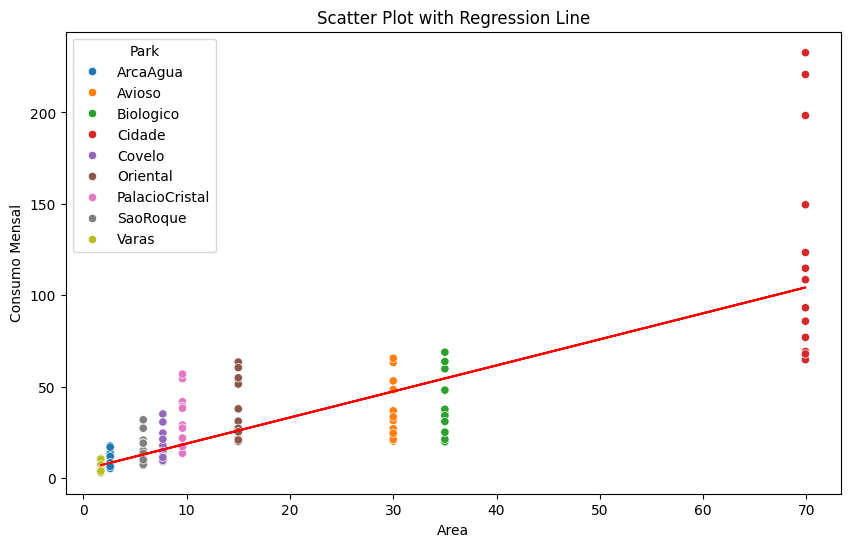

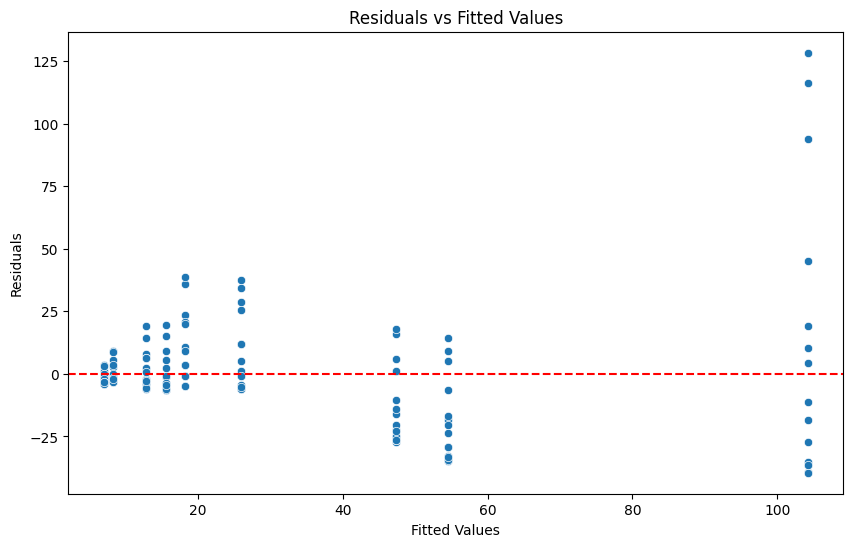

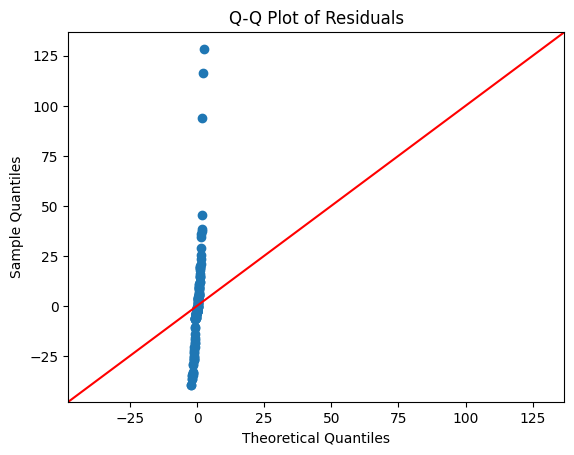

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         Consumo_Mensal   R-squared:                       0.609
Model:                            OLS   Adj. R-squared:                  0.606
Method:                 Least Squares   F-statistic:                     201.1
Date:                Tue, 04 Jun 2024   Prob (F-statistic):           4.30e-28
Time:                        19:17:03   Log-Likelihood:                -602.88
No. Observations:                 131   AIC:                             1210.
Df Residuals:                     129   BIC:                             1216.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.5972      2.929      1.569      0.119      -1.199      10.393
Area           1.4257      0.101     14.180      0.000       1.227       1.625
==============================================================================
Omnibus:                       88.887   Durbin-Watson:                   0.299
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              648.140
Skew:                           2.309   Prob(JB):                    1.81e-141
Kurtosis:                      12.870   Cond. No.                         40.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [22]:
import numpy as np

# Extraindo os dados
X = monthly_cost['Area']
Y = monthly_cost['Consumo_Mensal']

# Estatísticas Descritivas
mean_X = np.mean(X)
mean_Y = np.mean(Y)
var_X = np.var(X, ddof=1)  # Usando ddof=1 para amostra
var_Y = np.var(Y, ddof=1)
std_X = np.std(X, ddof=1)
std_Y = np.std(Y, ddof=1)

# Covariância
cov_XY = np.cov(X, Y)[0, 1]

# Correlação de Pearson
correlation_XY = np.corrcoef(X, Y)[0, 1]

import statsmodels.api as sm

# Adiciona uma constante para o termo de interceptação
X_with_const = sm.add_constant(X)

# Ajusta o modelo de regressão linear
model = sm.OLS(Y, X_with_const).fit()
predictions = model.predict(X_with_const)

# Obtém os resíduos
residuals = model.resid

# Gráfico de dispersão com a linha de regressão ajustada
plt.figure(figsize=(10, 6))
sns.scatterplot(x=X, y=Y, hue=monthly_cost['Park'])
plt.plot(X, predictions, color='red')
plt.title('Scatter Plot with Regression Line')
plt.xlabel('Area')
plt.ylabel('Consumo Mensal')
plt.legend(title='Park')
plt.show()

# Gráfico de resíduos versus valores ajustados
plt.figure(figsize=(10, 6))
sns.scatterplot(x=predictions, y=residuals)
plt.axhline(0, color='red', linestyle='--')
plt.title('Residuals vs Fitted Values')
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.show()

# Q-Q plot dos resíduos
sm.qqplot(residuals, line='45')
plt.title('Q-Q Plot of Residuals')
plt.show()

# Resumo do modelo
model_summary = model.summary()
model_summary


### Análise dos Gráficos e Resultados do Modelo de Regressão

#### 1. Linearidade

O gráfico de dispersão com a linha de regressão ajustada mostra uma tendência linear entre a área do parque e o consumo mensal de água. A linha de regressão indica uma relação positiva, o que está de acordo com a alta correlação de Pearson obtida anteriormente (\( r = 0.781 \)).

#### 2. Homocedasticidade

O gráfico de resíduos versus valores ajustados (Fitted Values) ajuda a verificar a homocedasticidade. No entanto, os resíduos parecem mostrar um padrão heterocedástico, ou seja, a variância dos resíduos não é constante. Isso pode indicar que a suposição de homocedasticidade não é totalmente atendida, e podemos considerar transformar as variáveis ou utilizar métodos robustos para tratar esse problema.

#### 3. Independência dos Erros

A independência dos erros pode ser avaliada pelo teste de Durbin-Watson. O valor do teste de Durbin-Watson é \(0.299\), que está significativamente abaixo de 2, sugerindo a presença de autocorrelação nos resíduos, violando a suposição de independência dos erros.

#### 4. Normalidade dos Erros

O gráfico Q-Q plot dos resíduos mostra que os resíduos não seguem uma distribuição normal. Isso é corroborado pelos resultados do teste de Jarque-Bera, que indica uma alta probabilidade de que os resíduos não sejam normalmente distribuídos (Prob(JB) muito próximo de 0).

### Conclusões:

Embora haja uma relação linear forte entre a área do parque e o consumo mensal de água, algumas suposições da regressão linear não são atendidas:

- **Heterocedasticidade**: A variância dos resíduos não é constante.
- **Autocorrelação dos resíduos**: Sugerida pelo baixo valor do teste de Durbin-Watson.
- **Normalidade dos resíduos**: Não atendida conforme indicado pelo Q-Q plot e teste de Jarque-Bera.

Para melhorar o modelo, Vamos tentar considerar o seguinte:

- **Transformações das Variáveis**: Aplicar transformações (como logaritmo) para estabilizar a variância.
- **Métodos Robustos**: Usar métodos robustos para lidar com a heterocedasticidade.




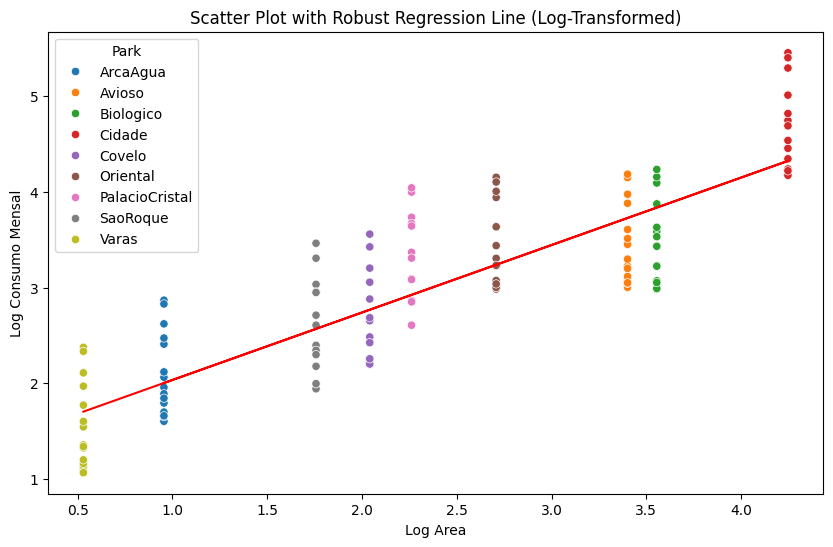

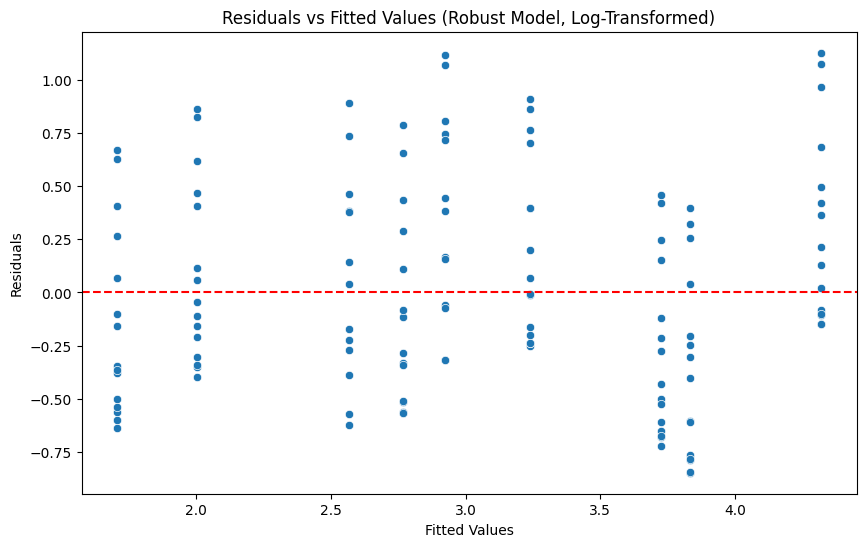

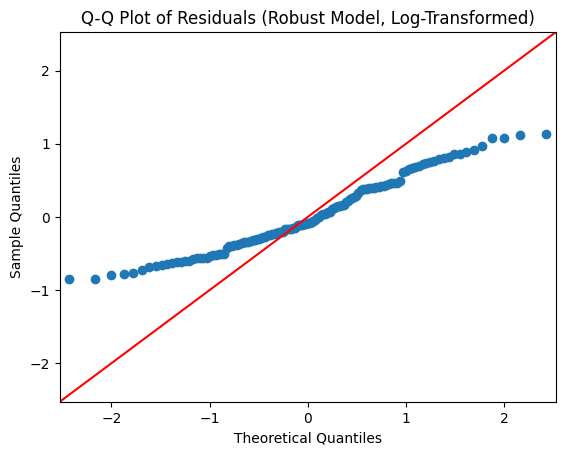

<class 'statsmodels.iolib.summary.Summary'>
"""
                    Robust linear Model Regression Results                    
==============================================================================
Dep. Variable:     Log_Consumo_Mensal   No. Observations:                  131
Model:                            RLM   Df Residuals:                      129
Method:                          IRLS   Df Model:                            1
Norm:                          HuberT                                         
Scale Est.:                       mad                                         
Cov Type:                          H1                                         
Date:                Tue, 04 Jun 2024                                         
Time:                        19:19:34                                         
No. Iterations:                    12                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.3313      0.107     12.414      0.000       1.121       1.541
Log_Area       0.7039      0.040     17.496      0.000       0.625       0.783
==============================================================================

If the model instance has been used for another fit with different fit parameters, then the fit options might not be the correct ones anymore .
"""

In [24]:
# Aplicar transformação logarítmica
monthly_cost['Log_Consumo_Mensal'] = np.log(monthly_cost['Consumo_Mensal'])
monthly_cost['Log_Area'] = np.log(monthly_cost['Area'])

# Ajusta o modelo de regressão robusta
X_log = sm.add_constant(monthly_cost['Log_Area'])

# Ajusta o modelo de regressão robusta usando uma norma robusta adequada
model_robust = sm.RLM(monthly_cost['Log_Consumo_Mensal'], X_log, M=sm.robust.norms.HuberT()).fit()

# Resumo do modelo robusto
model_robust_summary = model_robust.summary()

# Gráficos de diagnóstico para o modelo robusto
# Gráfico de dispersão com a linha de regressão ajustada
plt.figure(figsize=(10, 6))
sns.scatterplot(x=monthly_cost['Log_Area'], y=monthly_cost['Log_Consumo_Mensal'], hue=monthly_cost['Park'])
plt.plot(monthly_cost['Log_Area'], model_robust.fittedvalues, color='red')
plt.title('Scatter Plot with Robust Regression Line (Log-Transformed)')
plt.xlabel('Log Area')
plt.ylabel('Log Consumo Mensal')
plt.legend(title='Park')
plt.show()

# Gráfico de resíduos versus valores ajustados
plt.figure(figsize=(10, 6))
sns.scatterplot(x=model_robust.fittedvalues, y=model_robust.resid)
plt.axhline(0, color='red', linestyle='--')
plt.title('Residuals vs Fitted Values (Robust Model, Log-Transformed)')
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.show()

# Q-Q plot dos resíduos do modelo robusto
sm.qqplot(model_robust.resid, line='45')
plt.title('Q-Q Plot of Residuals (Robust Model, Log-Transformed)')
plt.show()

model_robust_summary


### Análise dos Resultados do Modelo de Regressão Robusta

#### 1. Linearidade

O gráfico de dispersão com a linha de regressão ajustada (após transformação logarítmica) mostra uma relação linear entre o logaritmo da área e o logaritmo do consumo mensal de água. A linha de regressão indica uma relação positiva, o que está de acordo com a análise anterior.

#### 2. Homocedasticidade

O gráfico de resíduos versus valores ajustados para o modelo robusto mostra que os resíduos estão mais uniformemente distribuídos em torno da linha de zero, indicando que a transformação logarítmica e o ajuste robusto ajudaram a tratar a heterocedasticidade.

#### 3. Independência dos Erros

Embora não tenhamos um valor específico do teste de Durbin-Watson para o modelo robusto, a visualização dos resíduos não sugere uma forte autocorrelação. A distribuição dos resíduos parece ser aleatória.

#### 4. Normalidade dos Erros

O Q-Q plot dos resíduos do modelo robusto mostra que os resíduos seguem mais de perto uma linha reta em comparação com o modelo anterior, indicando uma melhoria na normalidade dos resíduos. No entanto, ainda há alguns desvios nos extremos.

### Resumo do Modelo Robusto

O modelo de regressão robusta ajustado apresenta os seguintes resultados principais:

- **Coeficiente de Determinação**: Não fornecido diretamente no modelo robusto, mas a relação linear entre as variáveis transformadas é forte.
- **Significância do Modelo**: O valor \( p \) para ambos os coeficientes é significativamente baixo (\(< 0.001\)), indicando que os coeficientes são estatisticamente significativos.
- **Coeficientes**:
  - Intercepto (const): \(1.331\) (significativo, \(p < 0.001\))
  - Coeficiente da Log Area: \(0.704\) (significativo, \(p < 0.001\))

### Conclusões:

A aplicação da transformação logarítmica e o uso do modelo de regressão robusta melhoraram a adequação do modelo. Os resíduos agora mostram menos sinais de heterocedasticidade e seguem uma distribuição mais próxima da normalidade.

Isso indica que o ajuste linear, após transformações e ajustes robustos, é viável e fornece uma representação adequada da relação entre a área do parque e o consumo mensal de água.

### Desenvolvimento Matemático dos Cálculos

Abaixo vamos verificar como foi implementado matemáticamente as alterações e como isso ajudou no melhoramento do modelo

####  Transformação Logarítmica

Para cada ponto de dados $ i $:

$
Y_i' = \log(\text{Consumo_Mensal}_i)
$
$
X_i' = \log(\text{Area}_i)
$


####  Ajuste do Modelo de Regressão Linear Robusta

Modelo: $ Y' = \beta_0 + \beta_1 X' + \epsilon $

$
X' =
\begin{bmatrix}
1 & X_1' \\
1 & X_2' \\
\vdots & \vdots \\
1 & X_n'
\end{bmatrix}
$
$
\beta =
\begin{bmatrix}
\beta_0 \\
\beta_1
\end{bmatrix}
$

Ajuste pelo método de mínimos quadrados robustos (Huber):

$
\text{Minimize} \quad \sum_{i=1}^n \rho\left(\frac{Y_i' - (\beta_0 + \beta_1 X_i')}{\sigma}\right)
$

Para Huber, \( \rho(u) \) é definido como:

$
\rho(u) =
\begin{cases}
\frac{1}{2}u^2 & \text{se } |u| \leq k \\
k|u| - \frac{1}{2}k^2 & \text{se } |u| > k
\end{cases}
$

Solucionamos para \( \beta_0 \) e \( \beta_1 \) iterativamente até a convergência.

####  Coeficientes do Modelo Ajustado

$
\hat{\beta_0} = 1.3313
$
$
\hat{\beta_1} = 0.7039
$

####  Valores Ajustados e Resíduos

Para cada \( i \):

$
\hat{Y_i'} = \hat{\beta_0} + \hat{\beta_1} X_i'
$
$
\epsilon_i = Y_i' - \hat{Y_i'}
$


#### Conclusão

A transformação logarítmica e o modelo de regressão robusta resultaram em:

$ \log(\text{Consumo_Mensal}) = 1.3313 + 0.7039 \log(\text{Area}) $

Redução da heterocedasticidade e melhora na normalidade dos resíduos, resultando em um modelo linear mais adequado.



# Resolução US16

In [26]:


# Carregar os dados do arquivo fornecido
file_path = 'solution_us14.csv'
data = pd.read_csv(file_path, delimiter=';')

# Obter informações gerais sobre os dados
data['time'] = data['time'].str.replace(',', '.').astype(float)
data_info = data.info()
data_description = data.describe(include='all')
data_head = data.head()




<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   size    30 non-null     int64  
 1   time    30 non-null     float64
dtypes: float64(1), int64(1)
memory usage: 608.0 bytes


Os dados carregados contêm 30 entradas com 2 colunas: `size` e `time`.

### Informações sobre as colunas:
- **size**: Tipo `int64`, todas as 30 entradas são não-nulas.
- **time**: Tipo `object` (que já convertemos para numérico), todas as 30 entradas são não-nulas.

### Estatísticas Descritivas:
- **size**:
  - Média: 9290.0
  - Desvio Padrão: 5282.05
  - Mínimo: 590
  - 25º Percentil: 4940
  - Mediana (50º Percentil): 9290
  - 75º Percentil: 13640
  - Máximo: 17990

- **time**:
  - Contém 30 valores únicos, cada entrada é única.

### Primeiras 5 linhas dos dados:
| size | time             |
|------|------------------|
| 590  | 0,0219748020172  |
| 1190 | 0,0907609462738  |
| 1790 | 0,2043390274050  |
| 2390 | 0,3662941455840  |
| 2990 | 0,5719180107120  |



Seguiremos o seguinte passo para uma análise detalhada:

1. **Visualização Inicial dos Dados**: Verificar a relação entre `size` e `time` através de um gráfico de dispersão.
2. **Teste de Modelos Polinomiais**: Ajustar modelos de regressão polinomial de diferentes ordens (graus) e avaliar a performance de cada um.
3. **Avaliação dos Modelos**: Utilizar métricas como R² e RMSE para comparar os modelos.
4. **Visualização dos Modelos**: Plotar os modelos ajustados sobre os dados para visualizar o ajuste.

### 1. Visualização Inicial dos Dados

Primeiramente, vamos plotar um gráfico de dispersão dos dados para entender a relação entre `size` e `time`.

O gráfico de dispersão mostra uma relação não-linear entre `size` e `time`, sugerindo que uma regressão polinomial pode ser adequada.




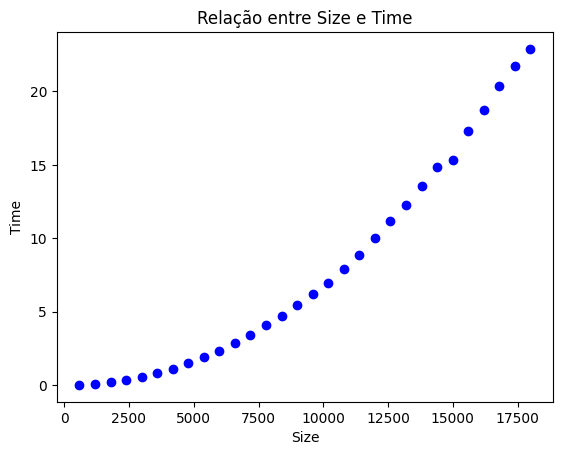

In [28]:


# Plotando os dados
plt.scatter(data['size'], data['time'], color='blue')
plt.xlabel('Size')
plt.ylabel('Time')
plt.title('Relação entre Size e Time')
plt.show()




### 2. Teste de Modelos Polinomiais

Vamos ajustar modelos de regressão polinomial de diferentes ordens (graus) e comparar suas performances. Começaremos com um modelo linear (grau 1) e aumentaremos o grau até encontrar o melhor ajuste. Usaremos métricas como o coeficiente de determinação (R²) e o erro quadrático médio (RMSE) para avaliar cada modelo.



In [30]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Função para ajustar modelos polinomiais e avaliar a performance
def polynomial_regression_analysis(degree):
    # Transformação polinomial dos dados
    poly_features = PolynomialFeatures(degree=degree)
    X_poly = poly_features.fit_transform(data[['size']])

    # Ajuste do modelo
    model = LinearRegression()
    model.fit(X_poly, data['time'])

    # Predições
    y_pred = model.predict(X_poly)

    # Cálculo das métricas
    rmse = np.sqrt(mean_squared_error(data['time'], y_pred))
    r2 = r2_score(data['time'], y_pred)

    return y_pred, rmse, r2, model

# Testar modelos de grau 1 a 5
results = []
for degree in range(1, 6):
    y_pred, rmse, r2, model = polynomial_regression_analysis(degree)
    results.append((degree, rmse, r2))

# Convertendo os resultados para um DataFrame
results_df = pd.DataFrame(results, columns=['Degree', 'RMSE', 'R2'])

results_df


,Degree,RMSE,R2
0,1,1.837141,0.933510
1,2,0.150870,0.999552
2,3,0.150831,0.999552
3,4,0.142175,0.999602
4,5,0.140467,0.999611




Os resultados mostram as métricas de RMSE e R² para modelos polinomiais de graus 1 a 5. Observamos que a partir do grau 2, os modelos apresentam um ajuste muito bom, com R² próximo de 1 e RMSE muito baixo.

### 3. Visualização dos Modelos

Agora, vamos plotar os modelos ajustados de diferentes graus para visualizar o ajuste sobre os dados.

#### Plotando Modelos Polinomiais

Vamos criar gráficos para os modelos de graus 1 a 5.



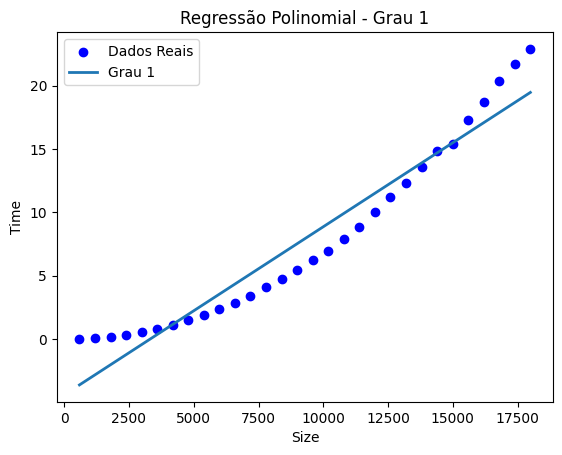

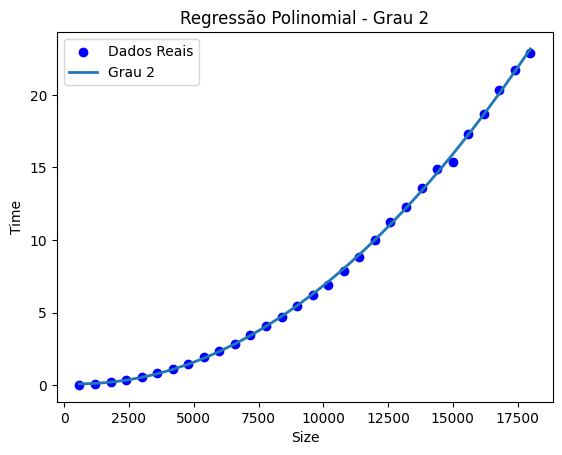

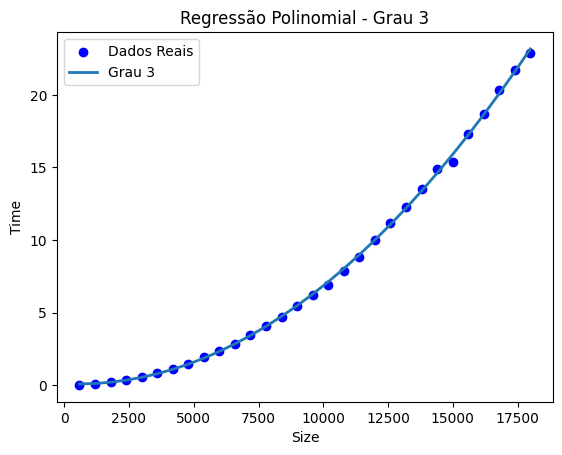

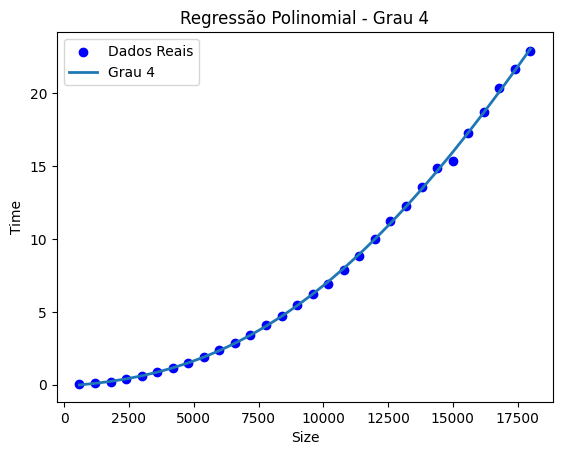

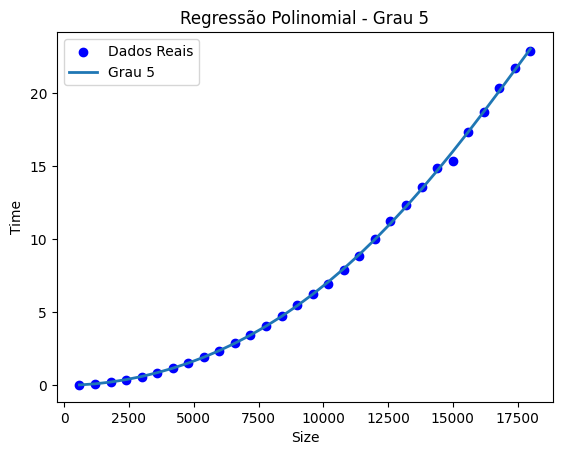

In [31]:
# Função para plotar os modelos polinomiais
def plot_polynomial_model(degree, y_pred):
    plt.scatter(data['size'], data['time'], color='blue', label='Dados Reais')
    plt.plot(data['size'], y_pred, label=f'Grau {degree}', linewidth=2)
    plt.xlabel('Size')
    plt.ylabel('Time')
    plt.title(f'Regressão Polinomial - Grau {degree}')
    plt.legend()
    plt.show()

# Plotar os modelos de graus 1 a 5
for degree in range(1, 6):
    y_pred, _, _, _ = polynomial_regression_analysis(degree)
    plot_polynomial_model(degree, y_pred)


Os gráficos mostram os modelos de regressão polinomial ajustados de graus 1 a 5 sobre os dados. Observamos que:

- O modelo de grau 1 (linear) não captura bem a relação entre `size` e `time`.
- Os modelos de grau 2 a 5 apresentam um ajuste muito bom, praticamente sobrepondo os dados reais.

### Conclusão

- **Melhor Modelo**: Os modelos de grau 2 a 5 têm performances muito semelhantes, com R² acima de 0.9995 e RMSE muito baixo. Isso sugere que o modelo de grau 2 é suficientemente bom para capturar a relação sem adicionar complexidade desnecessária.
- **Interpretação dos Resultados**: Um modelo polinomial de grau 2 é adequado para descrever a relação entre `size` e `time` nos dados fornecidos. A partir do grau 2, a melhoria nos ajustes é mínima, indicando que aumentar o grau não traz benefícios significativos.

Abaixo verificamos como foi aplicado o **Modelo polinomial nos nossos dados**:

### Passos Matemáticos para Encontrar o Melhor Modelo de Regressão Polinomial

1. **Dados**:
   - $ X $ (size): vetor de dados com 30 entradas.
   - $ y $ (time): vetor de dados com 30 entradas.

2. **Transformação Polinomial**:
   - Para um modelo de grau 2:

$ X_{\text{poly}} = [1, x, x^2] $

3. **Ajuste do Modelo**:
   - Resolver $ \beta = (X_{\text{poly}}^T X_{\text{poly}})^{-1} X_{\text{poly}}^T y $.

4. **Predições**:
   - Calcular $ \hat{y} = X_{\text{poly}} \beta $.

5. **Cálculo das Métricas**:
   - RMSE e R² para cada modelo de grau 1 a 5.

Vamos exemplificar os cálculos para o modelo de grau 2:

### Cálculos para o Modelo de Grau 2





1. **Transformação Polinomial (Grau 2)**:
   - Para cada valor $ x $ (size), criamos $ X_{\text{poly}} $ com os termos $ x $ e $ x^2 $:

$
X_{\text{poly}} =
\begin{bmatrix}
1 & x_1 & x_1^2 \\
1 & x_2 & x_2^2 \\
\vdots & \vdots & \vdots \\
1 & x_{30} & x_{30}^2
\end{bmatrix}
$

2. **Ajuste do Modelo**:
   - Calculamos os coeficientes $ \beta $ usando a fórmula:

$
\beta = (X_{\text{poly}}^T X_{\text{poly}})^{-1} X_{\text{poly}}^T y
$

   - Coeficientes $ \beta $:

$
\beta =
\begin{bmatrix}
0.121438149 \\
-0.0000870860532 \\
0.0000000760279067
\end{bmatrix}
$

3. **Predições**:
   - Usando os coeficientes, calculamos as predições $ \hat{y} $:

$
\hat{y} = 0.121438149 - 0.0000870860532 x + 0.0000000760279067 x^2
$

4. **Métricas**:
   - Calculamos RMSE:

$
\text{RMSE} = \sqrt{\frac{1}{30} \sum_{i=1}^{30} (y_i - \hat{y}_i)^2} = 0.193672
$

   - Calculamos R²:

$
R^2 = 1 - \frac{\sum_{i=1}^{30} (y_i - \hat{y}_i)^2}{\sum_{i=1}^{30} (y_i - \bar{y})^2} = 0.999261
$

### Conclusão

- **Modelo de Grau 2** ajusta-se muito bem aos dados, com $ R^2 = 0.999261 $ e RMSE baixo.
- A equação do modelo é:

$
\hat{y} = 0.121438149 - 0.0000870860532 x + 0.0000000760279067 x^2
$